# 3. Clustering with KMeans

In [120]:
%pip install prettytable

  Using cached prettytable-2.4.0-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.


In [121]:
import numpy as np
import pandas as pd
import pickle
from prettytable import PrettyTable
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# For visualizations
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import plotly.express as px

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (12., 9.)})
sns.set_style('whitegrid')
pal = ["#c6ff33","#41b6c4", "#225ea8","#081d58"]

In [3]:
df = pd.read_csv('../Data/data_ready_for_clustering.csv', encoding = "ISO-8859-1")

In [4]:
df.head()

,DaysBeingCustomer,Recency,Age,Income,Kids,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AvgProductsPerTrip,SharePurchasesOnDeal,Ed_Graduate,Ed_Postgraduate,Ed_Undergraduate,MS_Single,MS_Together,MS_Married,MS_Divorced,MS_Widow
0,1.976261,0.307416,1.017036,0.235065,-1.265354,0.983248,1.554197,1.679753,2.461071,1.475428,...,0.774679,-0.610237,0.992870,-0.786840,-0.35878,-0.339429,-0.793560,1.900081,-0.591123,-0.188851
1,-1.667186,-0.383316,1.273609,-0.236212,1.395042,-0.870921,-0.636379,-0.713323,-0.650425,-0.631481,...,-0.681808,1.501600,0.992870,-0.786840,-0.35878,-0.339429,-0.793560,1.900081,-0.591123,-0.188851
2,-0.172770,-0.797755,0.332841,0.773512,-1.265354,0.362220,0.572215,-0.177096,1.344593,-0.147134,...,0.016956,-1.109188,0.992870,-0.786840,-0.35878,-0.339429,-0.793560,-0.526293,1.691695,-0.188851
3,-1.925587,-0.797755,-1.292121,-1.023324,0.064844,-0.870921,-0.560842,-0.651280,-0.504001,-0.583047,...,-0.638135,0.532708,0.992870,-0.786840,-0.35878,-0.339429,-0.793560,-0.526293,1.691695,-0.188851
4,-0.823078,1.550734,-1.035548,0.241258,0.064844,-0.389550,0.421141,-0.216981,0.154904,-0.001830,...,-0.173020,0.671950,-1.007181,1.270907,-0.35878,-0.339429,1.260144,-0.526293,-0.591123,-0.188851


### I. Dimensionality Reduction - Principal Component Analysis (PCA)

Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

For this project, I am going to reduce my dataframe into just 2 variables.

In [5]:
pca = PCA(2)

In [6]:
df_pca = pd.DataFrame(pca.fit_transform(df), columns=["PC1", "PC2"])

In [7]:
df_pca.head()

,PC1,PC2
0,4.592863,0.169151
1,-3.171814,-0.955865
2,2.336434,-0.613678
3,-2.755199,-1.565638
4,-0.349110,1.093503


### II. KMeans

#### 1. The Elbow Method

This method will allow me to identify the optimal number of clusters.

In [8]:
kmeans = [KMeans(n_clusters=i) for i in range(1,21)]
for model in kmeans:
    model.fit(df)

In [9]:
inertias = [model.inertia_ for model in kmeans]

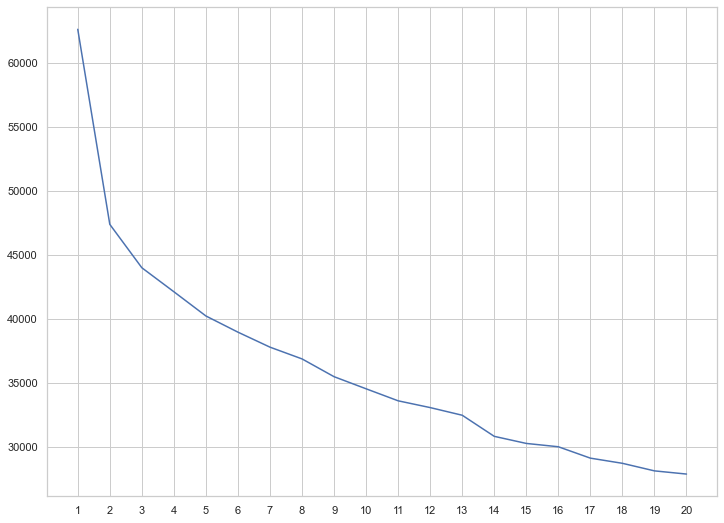

In [10]:
plt.plot(range(1,21),inertias)
plt.xticks(range(1,21));

It looks like the optimal number of clusters will be between 2 and 4, I will pick 4. 

#### 2. KMeans Clustering

In [11]:
km = KMeans(n_clusters = 4)
km.fit(df_pca)

KMeans(n_clusters=4)

In [12]:
y_pred = km.predict(df_pca)

In [13]:
df_pca['predict'] = y_pred

In [14]:
df_pca.head()

,PC1,PC2,predict
0,4.592863,0.169151,0
1,-3.171814,-0.955865,1
2,2.336434,-0.613678,2
3,-2.755199,-1.565638,1
4,-0.349110,1.093503,3


/opt/homebrew/Caskroom/miniconda/base/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


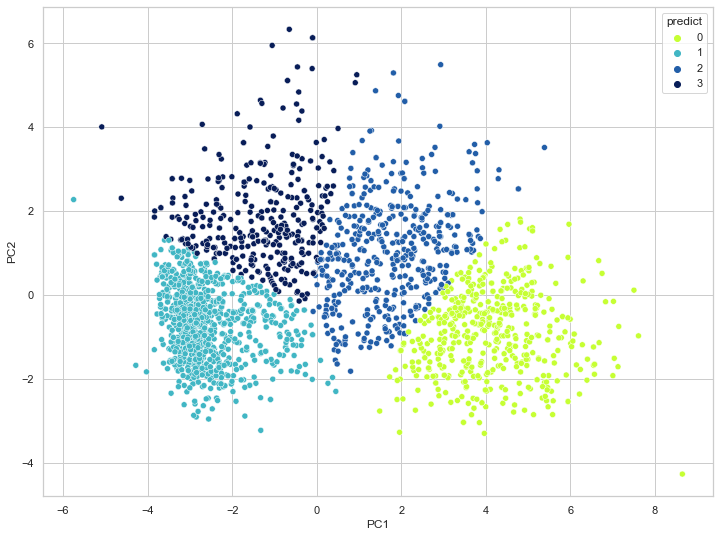

In [15]:
sns.scatterplot(df_pca['PC1'], df_pca['PC2'], hue = df_pca['predict'], palette = pal);

In [16]:
df_silueta = df_pca.drop(columns=["predict"])

In [17]:
silhouette_score(df_silueta, y_pred)

0.4321523999976162

In [113]:
# Now that I have a good model I will save it
pickle.dump(df_pca, open("clusters_kmeans_model", 'wb'))

### III. Interpretation of the clusters

We have now our clusters, but we do not know how the data has been divided by the algorithm, below the interpretation of it.

In [18]:
clients = pd.read_csv('../Data/data_clean.csv', encoding = "ISO-8859-1")

In [19]:
clients.shape

(2236, 22)

In [20]:
df_pca.shape

(2236, 3)

In [21]:
clients['Cluster'] = df_pca['predict'] # Including the predicted clusters into the original dataset

In [22]:
clients.head()

,DaysBeingCustomer,Recency,Age,Income,Education,Marital_Status,Kids,MntWines,MntFruits,MntMeatProducts,...,NumDealsPurchases,NumStorePurchases,NumCatalogPurchases,NumWebPurchases,NumWebVisitsMonth,TotalProductsL2Y,TotalPurchasesL2Y,AvgProductsPerTrip,SharePurchasesOnDeal,Cluster
0,1000,58,57,58138.0,Graduate,Single,0,635,88,546,...,3,4,10,8,7,1617,22,73.5,13.6,0
1,154,38,60,46344.0,Graduate,Single,2,11,1,6,...,2,2,1,1,5,27,4,6.8,50.0,1
2,501,26,49,71613.0,Graduate,Together,0,426,49,127,...,1,10,2,8,4,776,20,38.8,5.0,2
3,94,26,30,26646.0,Graduate,Together,1,11,4,20,...,2,4,0,2,6,53,6,8.8,33.3,1
4,350,94,33,58293.0,Postgraduate,Married,1,173,43,118,...,5,6,3,5,5,422,14,30.1,35.7,3


/opt/homebrew/Caskroom/miniconda/base/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cluster', ylabel='count'>

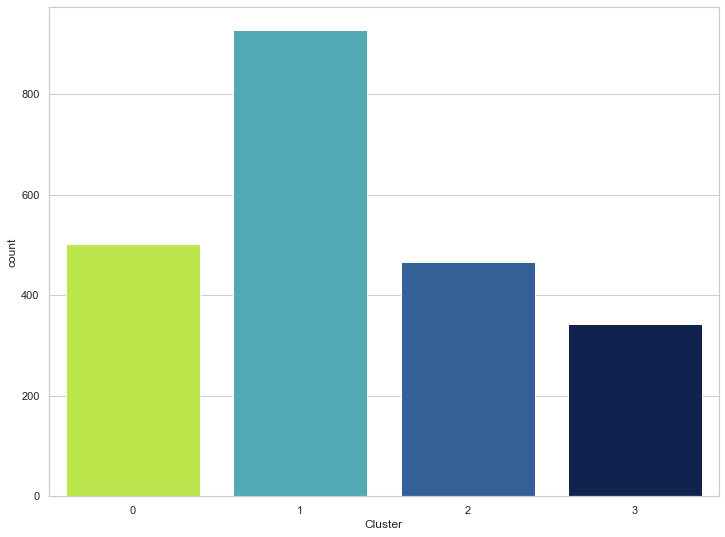

In [23]:
sns.countplot(clients['Cluster'], palette = pal)

First let's see how the income is distributed across the different clusters.

#### 1. Personal Attributes

<AxesSubplot:xlabel='Age', ylabel='Count'>

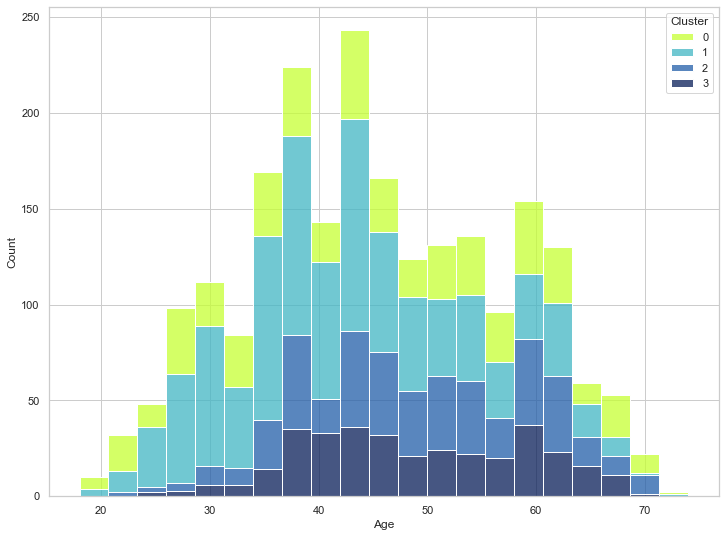

In [50]:
sns.histplot(data = clients, x = "Age", hue = "Cluster", multiple="stack", palette = pal)

<AxesSubplot:xlabel='Income', ylabel='Count'>

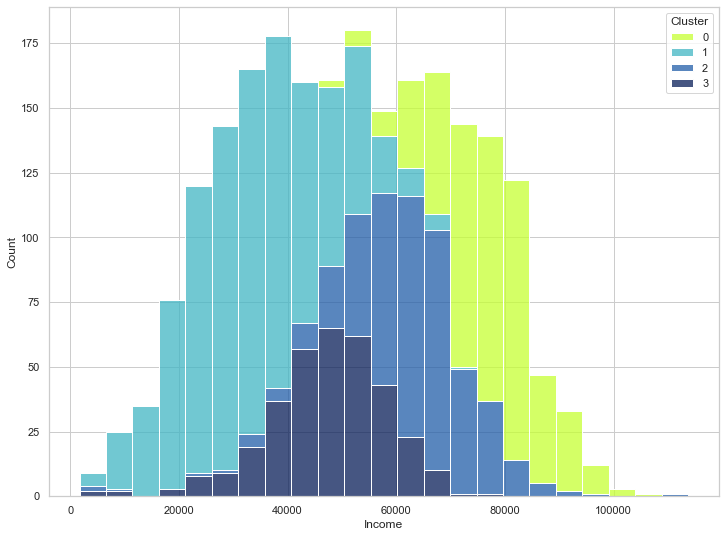

In [24]:
sns.histplot(data = clients.loc[clients['Income'] < 120000], x = "Income", hue = "Cluster", multiple="stack", palette = pal)

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

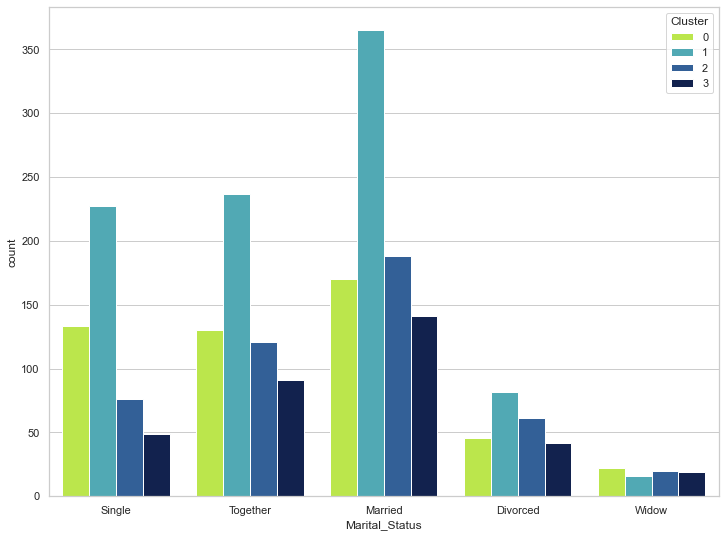

In [30]:
sns.countplot(data = clients, x = 'Marital_Status', hue = 'Cluster', palette = pal)

<AxesSubplot:xlabel='Education', ylabel='count'>

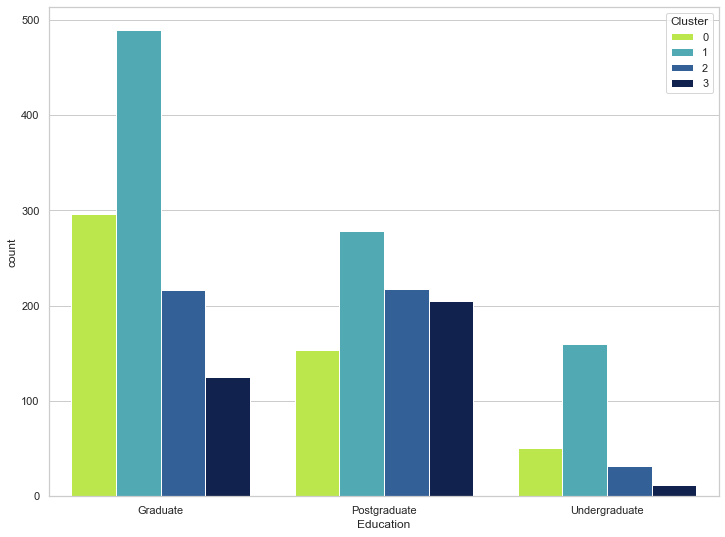

In [33]:
sns.countplot(data = clients, x = 'Education', hue = 'Cluster', palette = pal)

<AxesSubplot:xlabel='Kids', ylabel='count'>

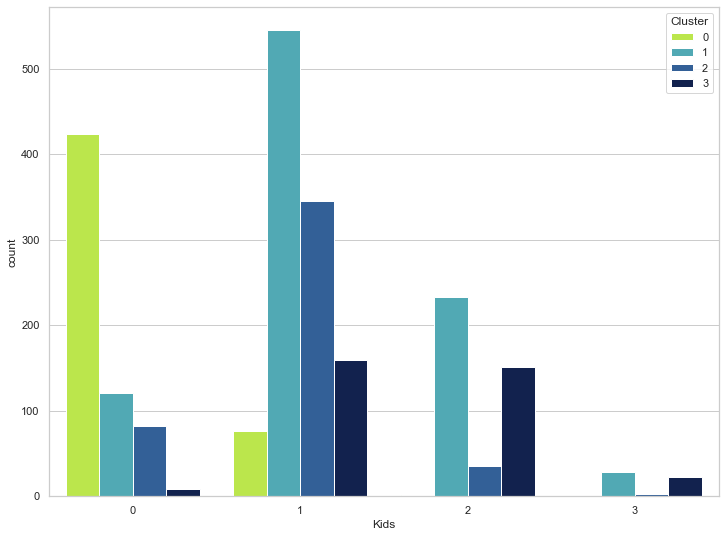

In [49]:
sns.countplot(data = clients, x = 'Kids', hue = 'Cluster', palette = pal)

#### 2. Products Columns

In [220]:
clients[['MntWines%', 'MntFruits%', 'MntMeatProducts%', 'MntFishProducts%', 'MntSweetProducts%', 'MntGoldProds%']] = clients[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].apply(lambda x: x/x.sum(), axis = 1)


In [224]:
clients[['Cluster', 'MntWines%', 'MntFruits%', 'MntMeatProducts%', 'MntFishProducts%', 'MntSweetProducts%', 'MntGoldProds%']].groupby(['Cluster']).mean()

,MntWines%,MntFruits%,MntMeatProducts%,MntFishProducts%,MntSweetProducts%,MntGoldProds%
Cluster,,,,,,
0,0.416759,0.053547,0.334812,0.078417,0.055847,0.060619
1,0.370537,0.060672,0.242715,0.088813,0.061953,0.175309
2,0.568903,0.041714,0.207919,0.055247,0.043601,0.082617
3,0.608754,0.023715,0.199549,0.036108,0.022952,0.108923


<AxesSubplot:xlabel='TotalPurchasesL2Y', ylabel='Count'>

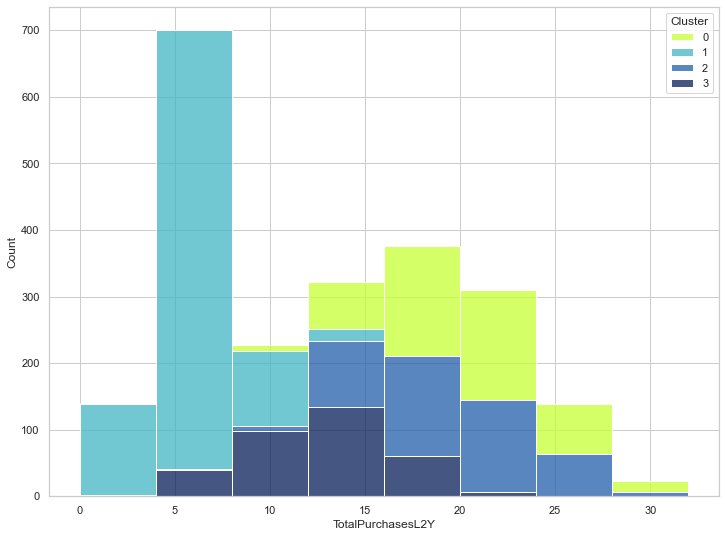

In [62]:
sns.histplot(data = clients, x = "TotalPurchasesL2Y", hue = "Cluster", multiple="stack", palette = pal, bins = 8)

#### 3. Promotion Columns

<AxesSubplot:xlabel='SharePurchasesOnDeal', ylabel='Count'>

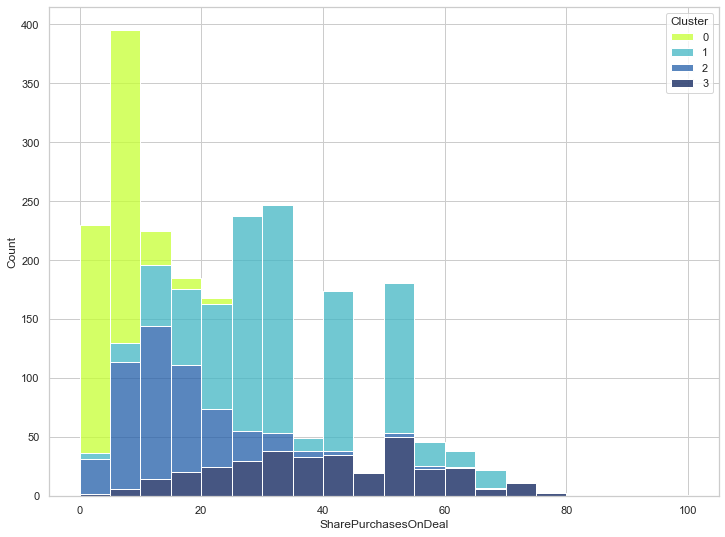

In [63]:
sns.histplot(data = clients, x = "SharePurchasesOnDeal", hue = "Cluster", multiple="stack", palette = pal, bins = 20)

#### 4. Place Columns

In [142]:
products = clients[['NumStorePurchases', 'NumCatalogPurchases', 'NumWebPurchases', 'TotalPurchasesL2Y', 'AvgProductsPerTrip', 'Cluster']]
products.groupby(['Cluster']).agg({'sum', 'mean'})
                                    

NumStorePurchases       NumCatalogPurchases       NumWebPurchases  \
                     mean   sum                mean   sum            mean   
Cluster                                                                     
0                8.506986  4262            6.069860  3041        5.077844   
1                3.145631  2916            0.485437   450        1.920173   
2                8.416309  3922            4.079399  1901        6.521459   
3                5.444444  1862            1.646199   563        5.204678   

              TotalPurchasesL2Y       AvgProductsPerTrip           
          sum              mean   sum               mean      sum  
Cluster                                                            
0        2544         19.654691  9847          78.316168  39236.4  
1        1780          5.551241  5146          13.667314  12669.6  
2        3039         19.017167  8862          49.706223  23163.1  
3        1780         12.295322  4205          29.097661   9951.4

In [223]:
clients[['NumStorePurchases%', 'NumCatalogPurchases%', 'NumWebPurchases%']] = clients[['NumStorePurchases', 'NumCatalogPurchases', 'NumWebPurchases']].apply(lambda x: x/x.sum(), axis = 1)


In [225]:
clients[['Cluster', 'NumStorePurchases%', 'NumCatalogPurchases%', 'NumWebPurchases%']].groupby(['Cluster']).mean()

,NumStorePurchases%,NumCatalogPurchases%,NumWebPurchases%
Cluster,,,
0,0.433087,0.308351,0.258562
1,0.596192,0.073485,0.330323
2,0.446862,0.212980,0.340157
3,0.447136,0.132338,0.420526


In [135]:
web = clients[['NumWebPurchases', 'NumWebVisitsMonth', 'Cluster']]
web.groupby(['Cluster']).sum()

,NumWebPurchases,NumWebVisitsMonth
Cluster,,
0,2544,1308
1,1780,5837
2,3039,2369
3,1780,2366


#### 5. Analysis by cluster

In [81]:
cluster0 = clients.loc[clients['Cluster'] == 0]
cluster1 = clients.loc[clients['Cluster'] == 1]
cluster2 = clients.loc[clients['Cluster'] == 2]
cluster3 = clients.loc[clients['Cluster'] == 3]

Text(0.5, 0.98, 'Age Distribution by Cluster')

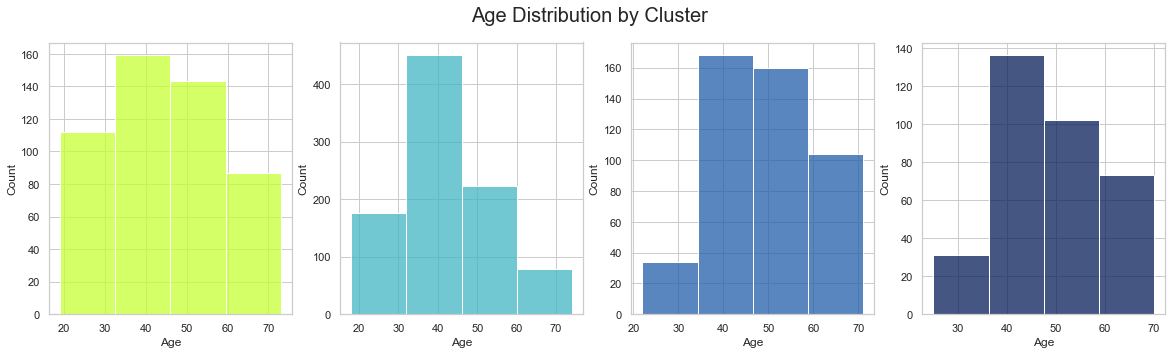

In [105]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
sns.histplot(data=cluster0, x='Age', ax=axs[0], color="#c6ff33", bins=4)
sns.histplot(data=cluster1, x='Age', ax=axs[1], color="#41b6c4", bins=4)
sns.histplot(data=cluster2, x='Age', ax=axs[2], color="#225ea8", bins=4)
sns.histplot(data=cluster3, x='Age', ax=axs[3], color="#081d58", bins=4)
fig.suptitle('Age Distribution by Cluster', fontsize = 20)

In [127]:
print(cluster0['Age'].mean())
print(cluster1['Age'].mean())
print(cluster2['Age'].mean())
print(cluster3['Age'].mean())

44.96207584830339
41.90291262135922
48.93133047210301
48.801169590643276


Text(0.5, 0.98, 'Income Distribution by Cluster')

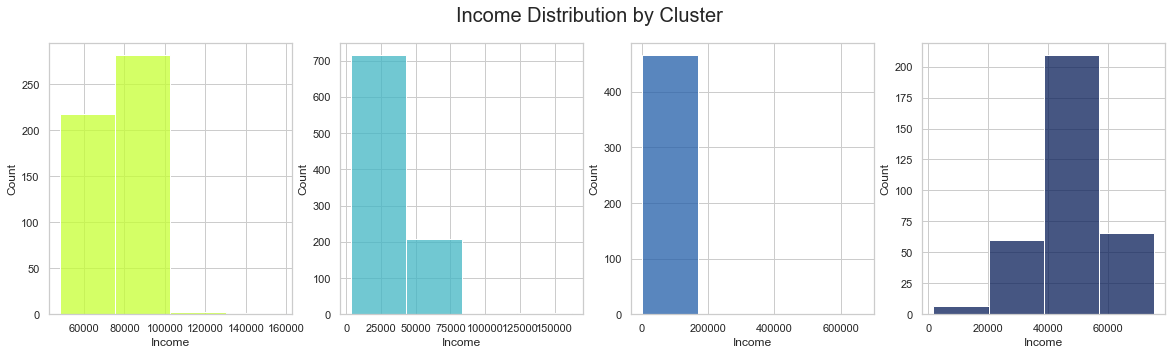

In [106]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
sns.histplot(data=cluster0, x='Income', ax=axs[0], color="#c6ff33", bins=4)
sns.histplot(data=cluster1, x='Income', ax=axs[1], color="#41b6c4", bins=4)
sns.histplot(data=cluster2, x='Income', ax=axs[2], color="#225ea8", bins=4)
sns.histplot(data=cluster3, x='Income', ax=axs[3], color="#081d58", bins=4)
fig.suptitle('Income Distribution by Cluster', fontsize = 20)

In [143]:
print(cluster0['Income'].mean())
print(cluster1['Income'].mean())
print(cluster2['Income'].mean())
print(cluster3['Income'].mean())

76810.70858060663
34741.752100911166
64406.410728655734
47198.266662750626


Text(0.5, 0.98, 'Education by Cluster')

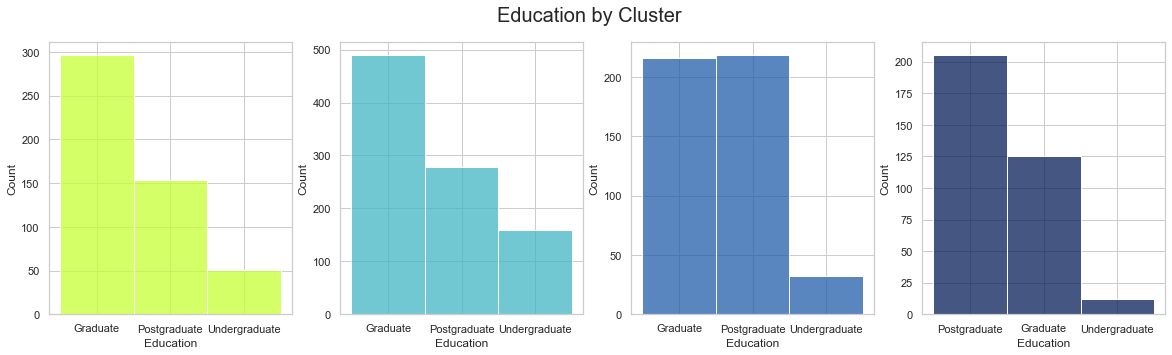

In [107]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
sns.histplot(data=cluster0, x='Education', ax=axs[0], color="#c6ff33", bins=4)
sns.histplot(data=cluster1, x='Education', ax=axs[1], color="#41b6c4", bins=4)
sns.histplot(data=cluster2, x='Education', ax=axs[2], color="#225ea8", bins=4)
sns.histplot(data=cluster3, x='Education', ax=axs[3], color="#081d58", bins=4)
fig.suptitle('Education by Cluster', fontsize = 20)

Text(0.5, 0.98, 'Kids by Cluster')

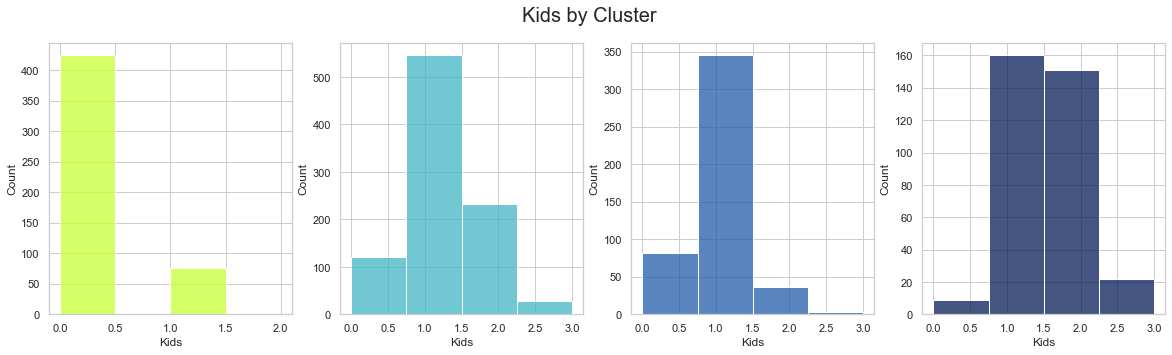

In [108]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
sns.histplot(data=cluster0, x='Kids', ax=axs[0], color="#c6ff33", bins=4)
sns.histplot(data=cluster1, x='Kids', ax=axs[1], color="#41b6c4", bins=4)
sns.histplot(data=cluster2, x='Kids', ax=axs[2], color="#225ea8", bins=4)
sns.histplot(data=cluster3, x='Kids', ax=axs[3], color="#081d58", bins=4)
fig.suptitle('Kids by Cluster', fontsize = 20)

In [176]:
print(cluster0['Kids'].mean())
print(cluster1['Kids'].mean())
print(cluster2['Kids'].mean())
print(cluster3['Kids'].mean())

0.15568862275449102
1.1812297734627832
0.9141630901287554
1.543859649122807


Text(0.5, 0.98, 'Total Purchases (Trips) by Cluster')

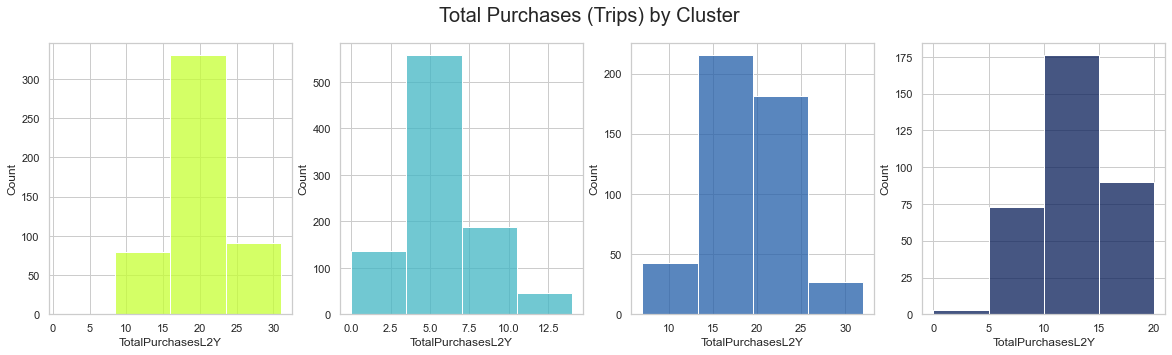

In [110]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
sns.histplot(data=cluster0, x='TotalPurchasesL2Y', ax=axs[0], color="#c6ff33", bins=4)
sns.histplot(data=cluster1, x='TotalPurchasesL2Y', ax=axs[1], color="#41b6c4", bins=4)
sns.histplot(data=cluster2, x='TotalPurchasesL2Y', ax=axs[2], color="#225ea8", bins=4)
sns.histplot(data=cluster3, x='TotalPurchasesL2Y', ax=axs[3], color="#081d58", bins=4)
fig.suptitle('Total Purchases (Trips) by Cluster', fontsize = 20)

In [144]:
print(cluster0['TotalPurchasesL2Y'].mean())
print(cluster1['TotalPurchasesL2Y'].mean())
print(cluster2['TotalPurchasesL2Y'].mean())
print(cluster3['TotalPurchasesL2Y'].mean())

19.654690618762476
5.5512405609492985
19.01716738197425
12.2953216374269


In [146]:
print(cluster0['SharePurchasesOnDeal'].mean())
print(cluster1['SharePurchasesOnDeal'].mean())
print(cluster2['SharePurchasesOnDeal'].mean())
print(cluster3['SharePurchasesOnDeal'].mean())

5.880638722554888
32.56450916936344
15.534549356223181
39.63625730994152


### IV. Characteristics by cluster

In [148]:
clusters = PrettyTable(['Charasteristics', 0, 1, 2, 3])

In [165]:
clusters.add_row(['Age', 
                  int(round(cluster0['Age'].mean(), 0)), 
                  int(round(cluster1['Age'].mean(), 0)), 
                  int(round(cluster2['Age'].mean(), 0)), 
                  int(round(cluster3['Age'].mean(), 0))])
                  

In [173]:
clusters.add_row(['Income ($k)', 
                  round(cluster0['Income'].mean()/1000, 1), 
                  round(cluster1['Income'].mean()/1000, 1), 
                  round(cluster2['Income'].mean()/1000, 1), 
                  round(cluster3['Income'].mean()/1000, 1)])


In [194]:
clusters.add_row(['Income Range','€€€€','€','€€€','€€'])

In [196]:
clusters.add_row(['Kids', '0 - 1', '1 - 2', '0 - 1', '1 - 3'])

In [198]:
clusters.add_row(['Loyalty Level', 'High', 'Low', 'High', 'Mid'])

In [200]:
clusters.add_row(['Promo Driven Level', 'Low (6%)', 'High (33%)', 'Mid (16%)', 'High (40%)'])

In [201]:
clusters

Charasteristics,0,1,2,3
Age Avg,45,42,49,49
Age,45,42,49,49
Income,77k,35k,64k,47
Age,5.880638722554888,32.56450916936344,15.534549356223181,39.63625730994152
Income,77k,35k,64k,47
Age,6.0,32.56450916936344,15.534549356223181,39.63625730994152
Income,77k,35k,64k,47
Age,5,32.56450916936344,15.534549356223181,39.63625730994152
Income,77k,35k,64k,47
Age,44,41.90291262135922,48.93133047210301,48.801169590643276
